In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## set pandas to display more columns
pd.set_option('display.max_columns',50)

In [2]:
#Model evaluation function
def evaluate_regression(model, X_train,y_train, X_test, y_test):
    """Evaluates a scikit learn regression model using r-squared and RMSE"""

    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train,
                                            squared=False)

    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")


    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test,
                                            squared=False)

    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [3]:
#Import model with joblib
import joblib
loaded = joblib.load('random_forest_l01.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'RandomForest'])

In [4]:
#Load in each variable
X_train_df = loaded['X_train']
y_train = loaded['y_train']
X_test_df = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
rf_clf = loaded['RandomForest']

In [5]:
evaluate_regression(rf_clf,X_train_df,y_train, X_test_df,y_test)

Training Data:	R^2= 0.94	RMSE= 432.60
Test Data:	R^2= 0.55	RMSE= 1120.24


In [6]:
# Import shap and initialize javascript:
import shap
shap.initjs()



Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [7]:
#showing len
len(X_train_df)

6392

In [8]:
X_shap = shap.sample(X_train_df,nsamples=400,random_state=321)
X_shap.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Fat_Content_Regular  \
7579    11.600000         0.037640   98.4042                       0.0   
7592    12.904458         0.034718  179.4344                       0.0   
7928    20.200000         0.060045  128.3678                       1.0   
8271    12.904458         0.057835   57.5562                       1.0   
2096    16.600000         0.026645   53.5614                       0.0   

      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
7579                     0.0               0.0                  0.0   
7592                     0.0               0.0                  0.0   
7928                     0.0               0.0                  0.0   
8271                     0.0               0.0                  0.0   
2096                     0.0               0.0                  0.0   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
7579               0.0              0.0                     0.0   
7592               1.0              0.0                     0.0   
7928               0.0              0.0                     0.0   
8271               0.0              0.0                     0.0   
2096               0.0              0.0                     1.0   

      Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  \
7579                              0.0                    0.0   
7592                              0.0                    0.0   
7928                              1.0                    0.0   
8271                              0.0                    0.0   
2096                              0.0                    0.0   

      Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  \
7579                           1.0                  0.0             0.0   
7592                           0.0                  0.0             0.0   
7928                           0.0                  0.0             0.0   
8271                           0.0                  0.0             0.0   
2096                           0.0                  0.0             0.0   

      Item_Type_Others  Item_Type_Seafood  Item_Type_Snack Foods  \
7579               0.0                0.0                    0.0   
7592               0.0                0.0                    0.0   
7928               0.0                0.0                    0.0   
8271               0.0                0.0                    1.0   
2096               0.0                0.0                    0.0   

      Item_Type_Soft Drinks  Item_Type_Starchy Foods  Outlet_Size_Large  \
7579                    0.0                      0.0                0.0   
7592                    0.0                      0.0                0.0   
7928                    0.0                      0.0                0.0   
8271                    0.0                      0.0                0.0   
2096                    0.0                      0.0                0.0   

      Outlet_Size_MISSING  Outlet_Size_Medium  Outlet_Size_Small  \
7579                  0.0                 1.0                0.0   
7592                  0.0                 1.0                0.0   
7928                  0.0                 1.0                0.0   
8271                  0.0                 1.0                0.0   
2096                  0.0                 1.0                0.0   

      Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
7579                          1.0                          0.0   
7592                          0.0                          0.0   
7928                          0.0                          0.0   
8271                          0.0                          0.0   
2096                          0.0                          0.0   

      Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
7579                          0.0                        0.0   
7592                          1.0                        0.0   
7928                          1.0    

In [9]:
#get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap 

7579    1388.8588
7592    6066.7696
7928    1398.8458
8271    2548.0166
2096     939.4438
          ...    
7864    6471.5760
4974    1104.5622
6914    1340.2554
7642    1977.4260
4501    2526.7110
Name: Item_Outlet_Sales, Length: 400, dtype: float64

In [10]:
#Create a SHAP explainer using your fit model

explainer = shap.Explainer(rf_clf)
explainer

In [11]:
# Getting the shap values
shap_values = explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

In [12]:
# get shape
X_shap.shape

(400, 31)

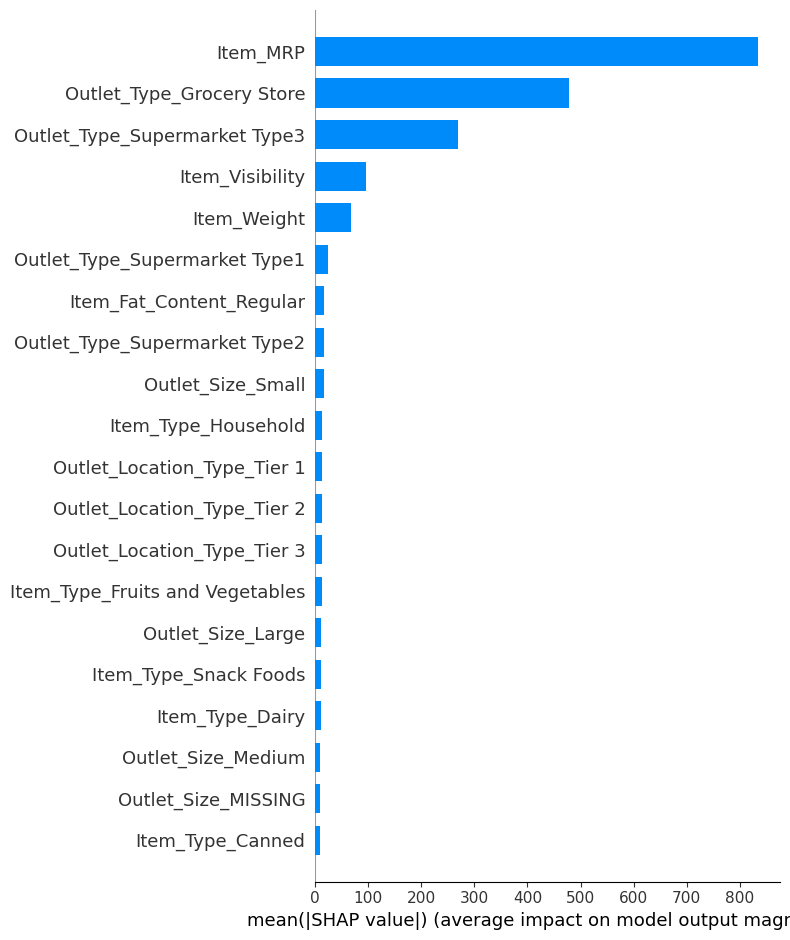

In [13]:
shap.summary_plot(shap_values,features= X_shap, plot_type='bar')

![Image Alt Text](randomforest.png)

- In the assessment of feature importance, both SHAP values and our original feature importance methodology have identified a common set of influential features. However, there are notable distinctions, primarily revolving around "Outlet_Type_Supermarket Type 3" and "Item Visibility."

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


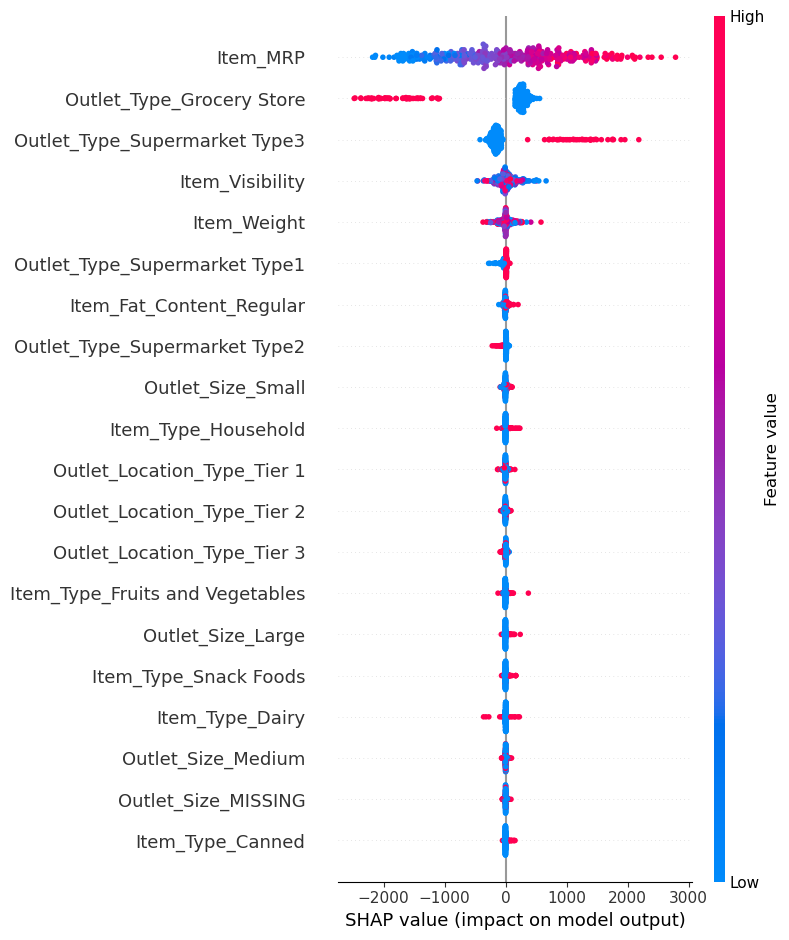

In [14]:
#Create a second summary plot
shap.summary_plot(shap_values,X_shap)

- Item_MRP:
  -A higher item's Maximum Retail Price (MRP), represented by the red color, is more likely to have a positive impact on our predictive model. 
- Outlet_Type_Grocery Store :
    -In the case of this feature, you'll notice that the majority of red values are concentrated to the left of 0. This implies that when an outlet is categorized as a grocery store, it's more likely that the associated items will have lower selling prices.
- Outlet_Type_Supermarket Type 3:
    -This feature exhibits a notable concentration of red values above 0. This signifies that outlets categorized under this type tend to lead to higher sales.

# Local Explanations

In [15]:
# Global Force Plot 
shap.force_plot(explainer.expected_value, shap_values.values, features=X_shap)



- I am selecting the top 3: High Item_MRP, Outlet_Type_Grocery Store, and Item_Visibility.

<Axes: xlabel='Item_MRP', ylabel='Count'>

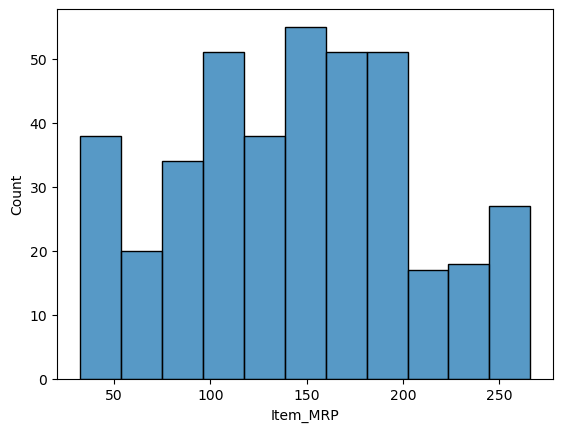

In [16]:
sns.histplot(X_shap['Item_MRP'])

In [48]:
# Item_MRP low Price filter_low
filter_low=X_shap['Item_MRP']> 100
filter_low.value_counts()

Item_MRP
True     302
False     98
Name: count, dtype: int64

<Axes: xlabel='Outlet_Type_Grocery Store', ylabel='Count'>

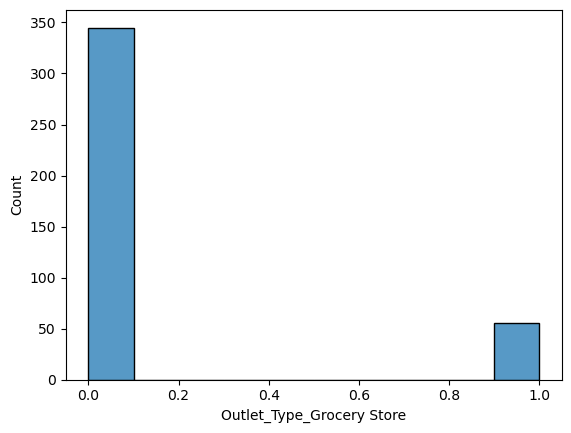

In [51]:
sns.histplot(X_shap['Outlet_Type_Grocery Store'])

In [19]:
#Outlet_Type_Grocery Store' == 1
filt_grocery = X_shap['Outlet_Type_Grocery Store'] == 1
filt_grocery.value_counts()


Outlet_Type_Grocery Store
False    345
True      55
Name: count, dtype: int64

<Axes: xlabel='Item_Visibility', ylabel='Count'>

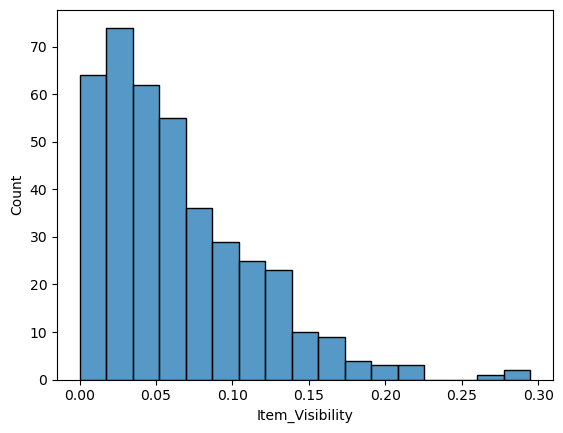

In [20]:
sns.histplot(X_shap['Item_Visibility'])

In [21]:
# Item_Visibility low visibility
filter_lowv=X_shap['Item_Visibility']<0.15
filter_lowv.value_counts()

Item_Visibility
True     376
False     24
Name: count, dtype: int64

### Group A
- High MRP
- Grocery Store
- Low Visibility

In [52]:
X_shap[filter_low & filt_grocery & filter_lowv]

Item_Weight  Item_Visibility  Item_MRP  Item_Fat_Content_Regular  \
6875    12.904458         0.033929  154.3972                       0.0   
953     17.750000         0.112986  185.4240                       1.0   
6145     6.825000         0.100172  262.7226                       0.0   
7889    16.100000         0.080011  124.2362                       1.0   
4770    16.350000         0.058034  124.8020                       0.0   
5671    12.904458         0.010468  162.9526                       0.0   
3935    12.904458         0.027532  185.0608                       0.0   
6983    12.904458         0.074620  120.1782                       1.0   
4117     8.185000         0.064825  116.0808                       0.0   
827     12.904458         0.109004  145.2418                       1.0   
6341    12.904458         0.000000  258.3988                       0.0   
236     12.904458         0.082741  118.7782                       1.0   
6167     8.895000         0.126288  235.5616                       0.0   
4634    12.904458         0.123557  216.6192                       0.0   
5729    12.904458         0.057969  119.3124                       0.0   
2010    12.904458         0.062000  230.0010                       0.0   
2945    12.904458         0.021813  194.7110                       1.0   
6469    16.200000         0.084260  192.3162                       0.0   
2153    12.904458         0.055567  263.5910                       0.0   
8054    15.000000         0.119461  126.3362                       0.0   
6728    12.904458         0.076435  155.8946                       1.0   
883     20.850000         0.062607  192.2478                       0.0   
2866    12.904458         0.066007  126.2704                       1.0   
2312    17.850000         0.074423  128.0020                       0.0   
4026    12.904458         0.134564  159.8236                       0.0   
1680    12.904458         0.046609  248.6776                       0.0   
4310    15.100000         0.000000  197.2110                       0.0   
5310     8.260000         0.057586  113.7834                       0.0   
6360    19.000000         0.112893  131.0626                       0.0   
5612    12.904458         0.037825  109.7228                       0.0   
5252    12.904458         0.078872  189.5556                       0.0   
3       19.200000         0.000000  182.0950                       1.0   
2479     6.115000         0.011791  189.0530                       1.0   
5773    20.600000         0.051068  213.0244                       1.0   
3983     7.260000         0.024142  117.4150                       0.0   

      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
6875                     0.0               0.0                  0.0   
953                      1.0               0.0                  0.0   
6145                     0.0               0.0                  0.0   
7889                     0.0               0.0                  0.0   
4770                     0.0               0.0                  0.0   
5671                     0.0               0.0                  0.0   
3935                     0.0               0.0                  0.0   
6983                     0.0               0.0                  0.0   
4117                     0.0               0.0                  0.0   
827                      0.0               0.0                  0.0   
6341                     0.0               0.0                  0.0   
236                      0.0               0.0                  0.0   
6167                     0.0               0.0                  0.0   
4634                     0.0               0.0                  0.0   
5729                     0.0               0.0                  0.0   
2010                     1.0               0.0                  0.0   
2945                     0.0               0.0                  0.0   
6469                     0.0               0.0                 

In [23]:
idx_example_A = 3
print(f"Item MRP: {X_shap.loc[idx_example_A,'Item_MRP']}")
print(f"Outlet Type: {X_shap.loc[idx_example_A,'Outlet_Type_Grocery Store']}")  
print(f"Item Visibility: {X_shap.loc[idx_example_A,'Item_Visibility']}")
print(f"Predicted Default Risk: {y_shap.loc[idx_example_A]}")
X_shap.loc[idx_example_A]

Item MRP: 182.095
Outlet Type: 1.0
Item Visibility: 0.0
Predicted Default Risk: 732.38


Item_Weight                         19.200
Item_Visibility                      0.000
Item_MRP                           182.095
Item_Fat_Content_Regular             1.000
Item_Type_Baking Goods               0.000
Item_Type_Breads                     0.000
Item_Type_Breakfast                  0.000
Item_Type_Canned                     0.000
Item_Type_Dairy                      0.000
Item_Type_Frozen Foods               0.000
Item_Type_Fruits and Vegetables      1.000
Item_Type_Hard Drinks                0.000
Item_Type_Health and Hygiene         0.000
Item_Type_Household                  0.000
Item_Type_Meat                       0.000
Item_Type_Others                     0.000
Item_Type_Seafood                    0.000
Item_Type_Snack Foods                0.000
Item_Type_Soft Drinks                0.000
Item_Type_Starchy Foods              0.000
Outlet_Size_Large                    0.000
Outlet_Size_MISSING                  1.000
Outlet_Size_Medium                   0.000
Outlet_Size

### Group B

In [35]:
#Use filters to select possible rows
filter_groupb = X_shap[filter_low & filter_lowv].index
filter_groupb

Index([7592, 6875,  953, 8228, 6145, 7026, 6235, 6092, 3723, 5367,
       ...
       2479, 6199, 2477, 5773, 7341, 2307, 8138, 5413, 7864, 4501],
      dtype='int64', length=189)

In [53]:
# select a row
filter_groupb_select = 236
groupb_select=np.random.choice(filter_groupb)
example_groupb=X_shap.loc[filter_groupb_select]
example_groupb.head(3)

Item_Weight         12.904458
Item_Visibility      0.082741
Item_MRP           118.778200
Name: 236, dtype: float64

In [54]:
y_pred = pd.Series(rf_clf.predict(X_shap), index=X_shap.index)

## Group A explanation

In [55]:
from lime.lime_tabular import LimeTabularExplainer
lime_explainer =LimeTabularExplainer(training_data=X_shap.values, feature_names=X_shap.columns, mode='regression')
lime_explainer

In [59]:
# lime tabular explainer group A
exp = lime_explainer.explain_instance(X_shap.iloc[3],
                                rf_clf.predict)
exp.show_in_notebook()



X does not have valid feature names, but RandomForestRegressor was fitted with feature names


- As we can see in the LIME explanation above, there were many factors contributing to the predicted positive impact for group A, such as:
- the Outlet_Type_Grocery Store
- The Outlet_Type_Supermarket Type3

- And for the negative side for group A such as:
- Item_MRP

In [25]:
#Individual forceplot
shap.force_plot(explainer.expected_value,
                shap_values= shap_values[idx_example_A].values,
               features=X_shap.iloc[idx_example_A])

- As we can see in the force plot above for group A:
- There was one feature pushing the prediction in the opposite direction such as:
- Item_MRP

## Group B explanation

In [58]:
#Individual forceplot
shap.force_plot(explainer.expected_value,
                shap_values= shap_values[filter_groupb_select].values,
               features=X_shap.iloc[filter_groupb_select])

- - As we can see in the force plot above for group B:
- There was one feature pushing the prediction in the opposite direction such as:
- Item_MRP
- The Outlet_Type_Supermarket Type3

In [60]:
# lime tabular explainer group A
exp = lime_explainer.explain_instance(X_shap.iloc[236],
                                rf_clf.predict)
exp.show_in_notebook()



X does not have valid feature names, but RandomForestRegressor was fitted with feature names


- As we can see in the LIME explanation above, there were many factors contributing to the predicted positive impact for group A, such as:
- the Outlet_Type_Grocery Store

- And for the negative side for group A such as:
- The Outlet_Type_Supermarket Type3
- Item_MRP